In [2]:
import os
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

### Initiate directories:

In [3]:
ROOT_DIR = os.getcwd() + '/../'
try:
    with open (ROOT_DIR + '/configuration.yml', 'r') as file:
        config = yaml.safe_load(file)
except Exception as e:
    print('Error reading the config file')
DATA_DIR = ROOT_DIR + config['data']['final'] + '/'
cities = pd.read_csv(ROOT_DIR + config['cities'])

### Cities information, eg. to loop over city names:

* **ALE:**	Alert, Canada
* **ABZ:**	Annaberg-Buchholz, Germany
* **ASP:**	Aspvreten, Sweden
* **BOT:**	Botsalano, South Africa
* **BSL:**	Bösel (Südoldenburg), Germany
* **EGB:**	Egbert, Canada
* **HEL:**	Helsinki, Finland
* **HPB:**	Hohenpeissenberg, Germany
* **HYY:**	Hyytiälä, Finland
* **KCE:**	Kosetice, Czech Republic
* **KPZ:**	K-Puszta, Hungary
* **MHD:**	Mace Head, Ireland
* **MAR:**	Marikana, South Africa
* **MLP:**	Melpitz, Germany
* **NAN:**	Nanjing, China
* **NEU:**	Neuglobsow, Germany
* **SAO:**	São Paulo, Brazil
* **SCH:**	Schauinsland, Germany
* **SGP:**	Southern Great Plains, Oklahoma, US
* **VIE:**	Vielsalm, Belgium
* **VAR:**	Värriö, Finland
* **WAL:**	Waldhof, Germany

In [33]:
cities.city.unique()

array(['ALE', 'ABZ', 'ASP', 'BOT', 'BSL', 'EGB', 'HEL', 'HPB', 'HYY',
       'KCE', 'KPZ', 'MHD', 'MAR', 'MLP', 'NAN', 'NEU', 'SAO', 'SCH',
       'SGP', 'VIE', 'VAR', 'WAL'], dtype=object)

In [4]:
city = cities.city[6]
city

'HEL'

### Open data file:

In [5]:
df = pd.read_csv(DATA_DIR + city + '.csv', index_col='date')
df.head()

,concentration,t,co
date,,,
2005-01-01,745.769167,271.50780,1.924972e-07
2005-01-02,374.991806,272.57120,1.903695e-07
2005-01-03,265.290294,272.60297,1.779340e-07
2005-01-04,304.682014,270.91785,2.032431e-07
2005-01-05,409.387986,272.37310,2.047700e-07


In [186]:
# calculating moving averages
df_ma = df.copy()
df_ma = df_ma.rolling(window=30).mean()

# normalizing the data
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df.values)
df_scaled = pd.DataFrame(x_scaled)
df_scaled.columns = df.columns.values

# log-transforming the data
df_log = df_scaled.transform(np.log)

# calculating moving averages for log-transformed data
df_log_ma = df_log.copy()
df_log_ma = df_log_ma.rolling(window=30).mean()

### Visualizations:

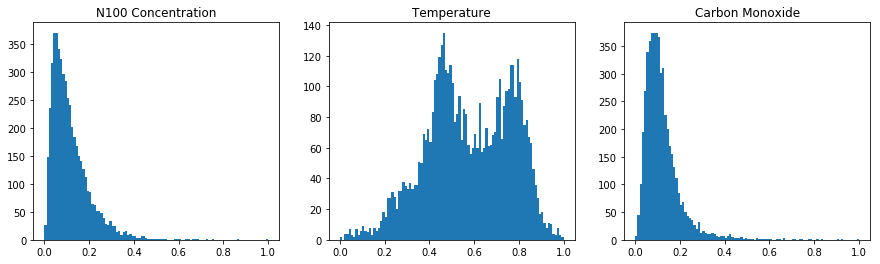

In [205]:
# plotting value distributions
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(4)

ax[0].hist(df_scaled.concentration, bins=100)
ax[1].hist(df_scaled.t, bins=100)
ax[2].hist(df_scaled.co, bins=100)

ax[0].set_title('N100 Concentration')
ax[1].set_title('Temperature')
ax[2].set_title('Carbon Monoxide');

N100 Concentration and Carbon Monoxide have a high positive skew and should therefore be log-tranformed

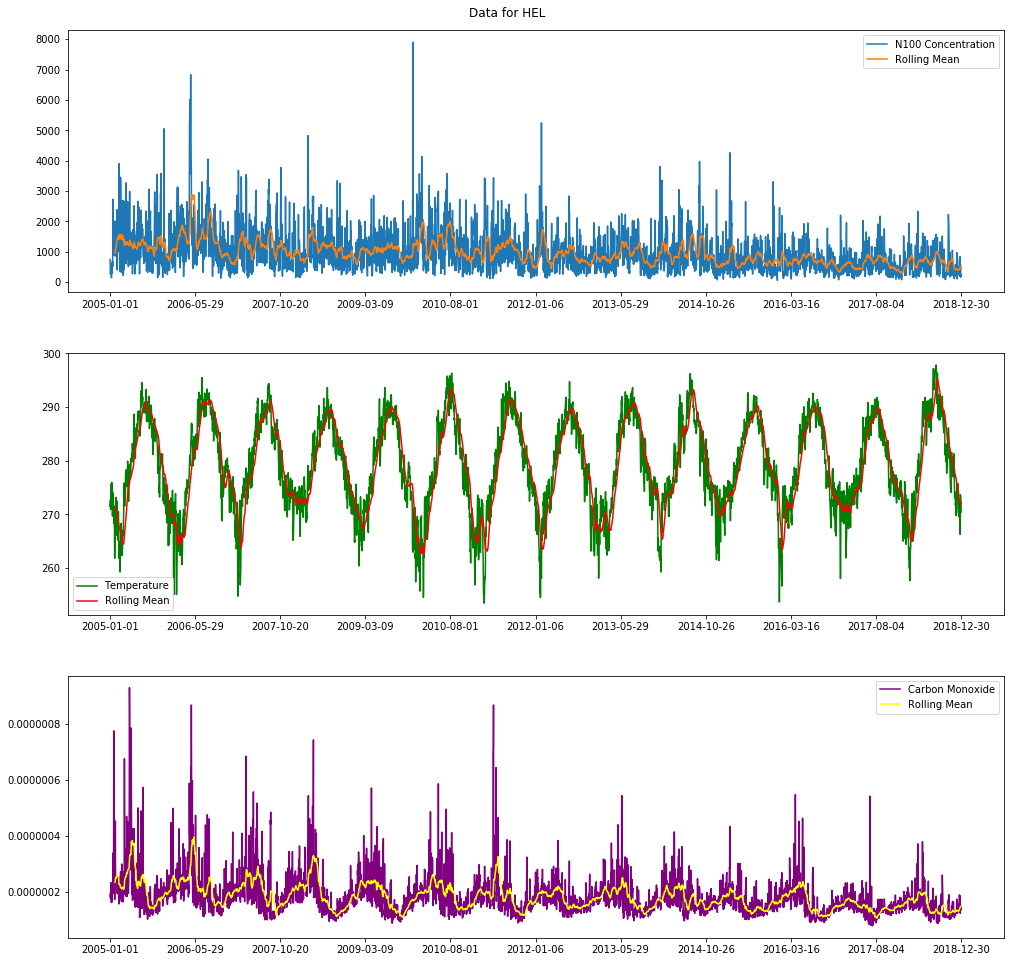

In [120]:
# plotting original data and trend (moving average)
idx = df.shape[0]
step = int(idx / 10)
xticks = pd.Series(df.index).iloc[list(range(0,idx,step))]

fig, ax = plt.subplots(3, 1)
fig.set_figwidth(15)
fig.set_figheight(14)

ax[0].plot(df.concentration[:idx], label='N100 Concentration')
ax[0].plot(df_ma.concentration[:idx], label='Rolling Mean')

ax[1].plot(df.t[:idx], label='Temperature', c='green')
ax[1].plot(df_ma.t[:idx], label='Rolling Mean', c='red')

ax[2].plot(df.co[:idx], label='Carbon Monoxide', c='purple')
ax[2].plot(df_ma.co[:idx], label='Rolling Mean', c='yellow')

for i in range(3):
    ax[i].legend()
    ax[i].set_xticks(xticks)

fig.tight_layout(pad=4)
fig.suptitle('Data for '+city);

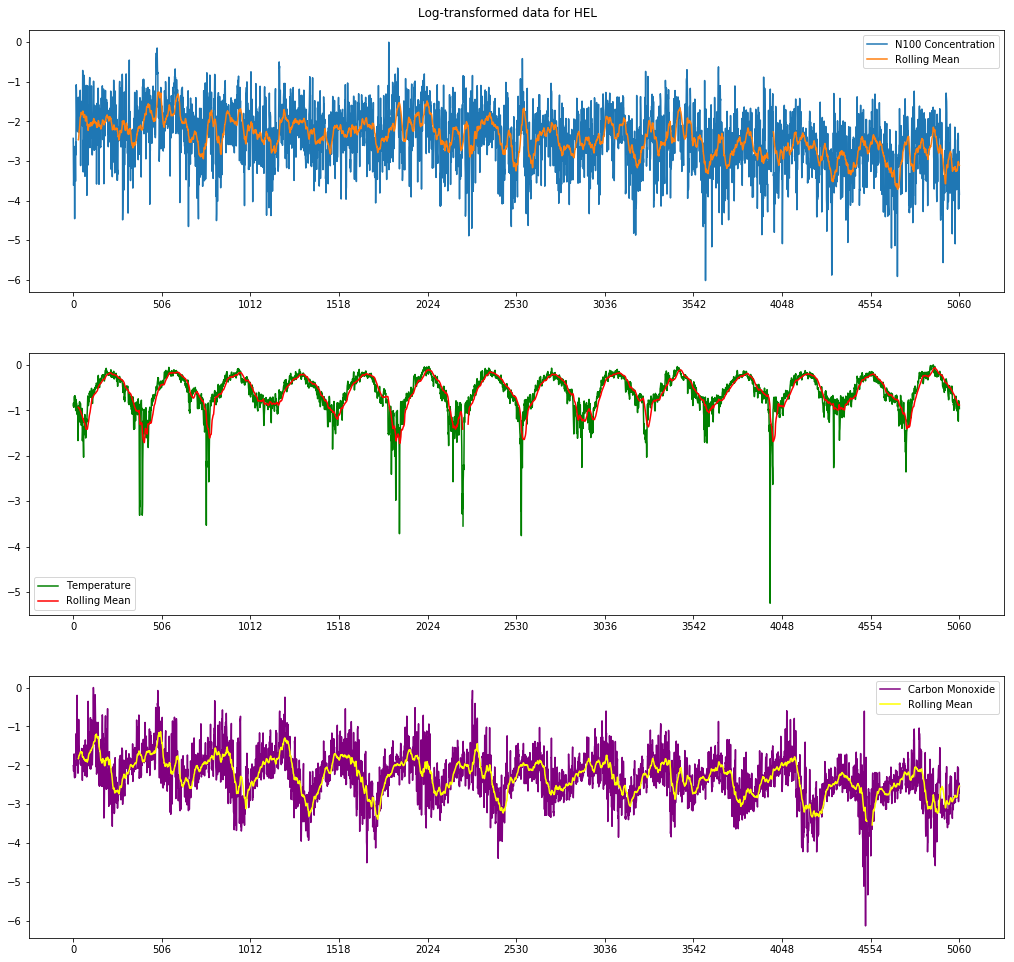

In [187]:
# plotting log-transformed data and trend (moving average)
idx = df_log.shape[0]
step = int(idx / 10)
xticks = pd.Series(df_log.index).iloc[list(range(0,idx,step))]

fig, ax = plt.subplots(3, 1)
fig.set_figwidth(15)
fig.set_figheight(14)

ax[0].plot(df_log.concentration[:idx], label='N100 Concentration')
ax[0].plot(df_log_ma.concentration[:idx], label='Rolling Mean')

ax[1].plot(df_log.t[:idx], label='Temperature', c='green')
ax[1].plot(df_log_ma.t[:idx], label='Rolling Mean', c='red')

ax[2].plot(df_log.co[:idx], label='Carbon Monoxide', c='purple')
ax[2].plot(df_log_ma.co[:idx], label='Rolling Mean', c='yellow')

for i in range(3):
    ax[i].legend()
    ax[i].set_xticks(xticks)

fig.tight_layout(pad=4)
fig.suptitle('Log-transformed data for '+city);

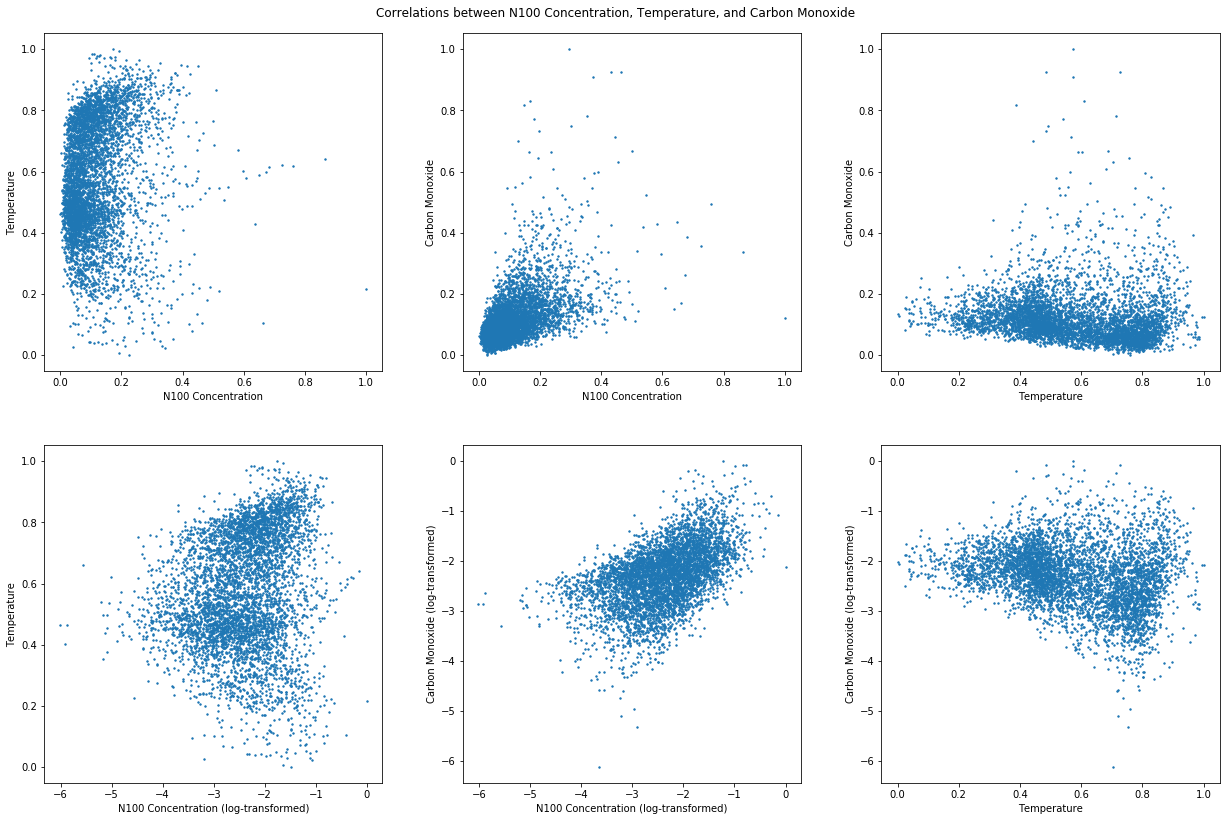

In [213]:
# plotting correlations of variables
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(18,12)
fig.suptitle('Correlations between N100 Concentration, Temperature, and Carbon Monoxide')

ax[0, 0].scatter(df_scaled.concentration, df_scaled.t, s=2)
ax[0, 1].scatter(df_scaled.concentration, df_scaled.co, s=2)
ax[0, 2].scatter(df_scaled.t, df_scaled.co, s=2)

ax[1, 0].scatter(df_log.concentration, df_scaled.t, s=2)
ax[1, 1].scatter(df_log.concentration, df_log.co, s=2)
ax[1, 2].scatter(df_scaled.t, df_log.co, s=2)

for i in range(2):
    n100 = 'N100 Concentration'
    t = 'Temperature'
    co = 'Carbon Monoxide'
    
    if i == 1:
        log = ' (log-transformed)'
        n100 += log
        co += log
    
    ax[i, 0].set_xlabel(n100)
    ax[i, 1].set_xlabel(n100)
    ax[i, 2].set_xlabel(t)

    ax[i, 0].set_ylabel(t)
    ax[i, 1].set_ylabel(co)
    ax[i, 2].set_ylabel(co)
    
fig.tight_layout(pad=4);

In [218]:
# calculating correlation coefficients
pr = 4  # precision

print('NORMALIZED DATA')
print('Correlations between...')
print('\tN100 and T:',
      np.round(np.corrcoef(df_scaled.concentration, df_scaled.t)[0,1], pr))
print('\tN100 and CO:',
      np.round(np.corrcoef(df_scaled.concentration, df_scaled.co)[0,1], pr))
print('\tT and CO:',
      np.round(np.corrcoef(df_scaled.t, df_scaled.co)[0,1], pr))

# removing rows that contain infinity
df_log_subset = df_log.loc[np.isinf(df_log).any(axis=1) == False]
df_scaled_subset = df_scaled.loc[np.isinf(df_log).any(axis=1) == False]

print('\n')
print('LOG-TRANSFORMED DATA (N100 and CO)')
print('Correlations between...')
print('\tN100 and T:',
      np.round(np.corrcoef(df_log_subset.concentration, df_scaled_subset.t)[0,1], pr))
print('\tN100 and CO:',
      np.round(np.corrcoef(df_log_subset.concentration, df_log_subset.co)[0,1], pr))
print('\tT and CO:',
      np.round(np.corrcoef(df_scaled_subset.t, df_log_subset.co)[0,1], pr))

NORMALIZED DATA
Correlations between...
	N100 and T: 0.1286
	N100 and CO: 0.508
	T and CO: -0.1091


LOG-TRANSFORMED DATA (N100 and CO)
Correlations between...
	N100 and T: 0.1775
	N100 and CO: 0.5039
	T and CO: -0.2429


Using the log-transform actually made the correlations stronger. (When also using a log-transform for the temperature data the correlation was weakened.)